##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Image classification with TensorFlow Lite Model Maker

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/lite/tutorials/model_maker_image_classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/tutorials/model_maker_image_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/tutorials/model_maker_image_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/tensorflow/tensorflow/lite/g3doc/tutorials/model_maker_image_classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
  <td>
    <a href="https://tfhub.dev/"><img src="https://www.tensorflow.org/images/hub_logo_32px.png" />See TF Hub model</a>
  </td>
</table>

The [TensorFlow Lite Model Maker library](https://www.tensorflow.org/lite/guide/model_maker) simplifies the process of adapting and converting a TensorFlow neural-network model to particular input data when deploying this model for on-device ML applications.

This notebook shows an end-to-end example that utilizes this Model Maker library to illustrate the adaption and conversion of a commonly-used image classification model to classify flowers on a mobile device.

## Prerequisites

To run this example, we first need to install several required packages, including Model Maker package that in GitHub [repo](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker).

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"henseljahja","key":"a7da63725f50a553e8d52e278d4193c0"}'}

In [ ]:
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-10-10 17:55:57          13593  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           8176  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3624  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Women                               838MB  2021-02-28 14:56:00           1560  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.0 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=b40ca6310824f771d9d2b8662dded2aea32d56a5907cdd50c6d9c08f827dc1ca
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle kernels output henseljahja/notebooka8eb73689a -p /content/sample_data/

tcmalloc: large alloc 3463593984 bytes == 0x55fcc1c28000 @  0x7f05a85251e7 0x55fbc49e5f98 0x55fbc49b0e27 0x55fbc49b2e20 0x55fbc49b42ed 0x55fbc4aa5e1d 0x55fbc4a27e99 0x55fbc48f4d14 0x55fbc4aa5f31 0x55fbc4ad3849 0x55fbc4a23a7d 0x55fbc4a229ee 0x55fbc49b648c 0x55fbc49b6698 0x55fbc4a24fe4 0x55fbc4a229ee 0x55fbc49b648c 0x55fbc49b6698 0x55fbc4a24fe4 0x55fbc4a229ee 0x55fbc48f4e2b 0x55fbc4a24fe4 0x55fbc4a229ee 0x55fbc49b5bda 0x55fbc4a27d00 0x55fbc4a229ee 0x55fbc49b5bda 0x55fbc4a23c0d 0x55fbc4a229ee 0x55fbc49b648c 0x55fbc49b6698
Output file downloaded to /content/sample_data/CelebA-Spoof-Mini.zip
Kernel log downloaded to /content/sample_data/notebooka8eb73689a.log 


In [ ]:
!unzip "/content/sample_data/CelebA-Spoof-Mini.zip" -d "/content/sample_data/CelebA-Spoof-Mini/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/sample_data/CelebA-Spoof-Mini/spoof/499116.png  
  inflating: /content/sample_data/CelebA-Spoof-Mini/spoof/496393.png  
  inflating: /content/sample_data/CelebA-Spoof-Mini/spoof/497723.png  
  inflating: /content/sample_data/CelebA-Spoof-Mini/spoof/542519.png  
  inflating: /content/sample_data/CelebA-Spoof-Mini/spoof/551004.png  
  inflating: /content/sample_data/CelebA-Spoof-Mini/spoof/558728.png  
  inflating: /content/sample_data/CelebA-Spoof-Mini/spoof/500940.png  
  inflating: /content/sample_data/CelebA-Spoof-Mini/spoof/494672.png  
  inflating: /content/sample_data/CelebA-Spoof-Mini/spoof/524387.png  
  inflating: /content/sample_data/CelebA-Spoof-Mini/spoof/534692.png  
  inflating: /content/sample_data/CelebA-Spoof-Mini/spoof/528384.png  
  inflating: /content/sample_data/CelebA-Spoof-Mini/spoof/546952.png  
  inflating: /content/sample_data/CelebA-Spoof-Mini/spoof/523423.png  
  inflating: /content/samp

In [ ]:
!pip install -q tflite-model-maker

Import the required packages.

In [ ]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

## Simple End-to-End Example

### Get the data path

Let's get some images to play with this simple end-to-end example. Hundreds of images is a good start for Model Maker while more data could achieve better accuracy.

In [ ]:
image_path = tf.keras.utils.get_file(
      'flower_photos.tgz',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      extract=True)
image_path = os.path.join(os.path.dirname(image_path), 'flower_photos')

228827136/228813984 [==============================] - 2s 0us/step


You could replace `image_path` with your own image folders. As for uploading data to colab, you could find the upload button in the left sidebar shown in the image below with the red rectangle. Just have a try to upload a zip file and unzip it. The root file path is the current path.

<img src="https://storage.googleapis.com/download.tensorflow.org/models/tflite/screenshots/model_maker_image_classification.png" alt="Upload File" width="800" hspace="100">

If you prefer not to upload your images to the cloud, you could try to run the library locally following the [guide](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker) in GitHub.

### Run the example
The example just consists of 4 lines of code as shown below, each of which representing one step of the overall process.


Step 1.   Load input data specific to an on-device ML app. Split it into training data and testing data.

In [ ]:
image_path = "/content/sample_data/CelebA-Spoof-Mini"
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.8)

INFO:tensorflow:Load image with size: 7889, num_label: 2, labels: live, spoof.


Step 2. Customize the TensorFlow model.

In [ ]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
197/197 [==============================] - 289s 1s/step - loss: 0.3483 - accuracy: 0.9124
Epoch 2/5
197/197 [==============================] - 280s 1s/step - loss: 0.2838 - accuracy: 0.9618
Epoch 3/5
197/197 [==============================] - 283s 1s/step - loss: 0.2770 - accuracy: 0.9645
Epoch 4/5
197/197 [==============================] - 279s 1s/step - loss: 0.2713 - accuracy: 0.9697
Epoch 5/5
197/197 [==============================] - 282s 1s/step - loss: 0.2663 - accuracy: 0.9722


Step 3. Evaluate the model.

In [ ]:
loss, accuracy = model.evaluate(test_data)

50/50 [==============================] - 111s 1s/step - loss: 0.2550 - accuracy: 0.9804


Step 4.  Export to TensorFlow Lite model.

Here, we export TensorFlow Lite model with [metadata](https://www.tensorflow.org/lite/convert/metadata) which provides a standard for model descriptions. The label file is embedded in metadata. The default post-training quantization technique is full integer quantization for the image classification task.

You could download it in the left sidebar same as the uploading part for your own use.

In [ ]:
model.export(export_dir='/content')

INFO:tensorflow:Assets written to: /tmp/tmppmn47dee/assets


INFO:tensorflow:Assets written to: /tmp/tmppmn47dee/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp91r5m09w/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp91r5m09w/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/model.tflite


After these simple 4 steps, we could further use TensorFlow Lite model file in on-device applications like in [image classification](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification) reference app.

In [ ]:
!ls /tmp/

dap_multiplexer.8542bb60253e.root.log.INFO.20211013-035542.56  tmp7rkjikzt.py
dap_multiplexer.INFO					       tmp7rmmen8s.py
debugger_1kee44qmg3					       tmpe7bcu_ww.py
initgoogle_syslog_dir.0					       tmpeovhbzd_.py
__pycache__						       tmpht36i_e9.py
tfhub_modules						       tmpmllasnqb.py
tmp3dx85et9.py						       tmprhiildg3.py
tmp7614ty48.py						       tmprtk_falj.py
tmp765ckul2.py						       tmp_tu1locv.py
tmp7qc2yz05.py						       tmpxtcjl9ie.py


## Detailed Process

Currently, we support several models such as  EfficientNet-Lite* models, MobileNetV2, ResNet50 as pre-trained models for image classification. But it is very flexible to add new pre-trained models to this library with just a few lines of code.


The following walks through this end-to-end example step by step to show more detail.

### Step 1: Load Input Data Specific to an On-device ML App

The flower dataset contains 3670 images belonging to 5 classes. Download the archive version of the dataset and untar it.

The dataset has the following directory structure:

<pre>
<b>flower_photos</b>
|__ <b>daisy</b>
    |______ 100080576_f52e8ee070_n.jpg
    |______ 14167534527_781ceb1b7a_n.jpg
    |______ ...
|__ <b>dandelion</b>
    |______ 10043234166_e6dd915111_n.jpg
    |______ 1426682852_e62169221f_m.jpg
    |______ ...
|__ <b>roses</b>
    |______ 102501987_3cdb8e5394_n.jpg
    |______ 14982802401_a3dfb22afb.jpg
    |______ ...
|__ <b>sunflowers</b>
    |______ 12471791574_bb1be83df4.jpg
    |______ 15122112402_cafa41934f.jpg
    |______ ...
|__ <b>tulips</b>
    |______ 13976522214_ccec508fe7.jpg
    |______ 14487943607_651e8062a1_m.jpg
    |______ ...
</pre>

In [ ]:
# image_path = tf.keras.utils.get_file(
#       'flower_photos.tgz',
#       'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
#       extract=True)
# image_path = os.path.join(os.path.dirname(image_path), 'flower_photos')

Use `DataLoader` class to load data.

As for `from_folder()` method, it could load data from the folder. It assumes that the image data of the same class are in the same subdirectory and the subfolder name is the class name. Currently, JPEG-encoded images and PNG-encoded images are supported.

In [ ]:
image_path = "/content/sample_data/CelebA-Spoof-Mini"
data = DataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 7889, num_label: 2, labels: live, spoof.


INFO:tensorflow:Load image with size: 7889, num_label: 2, labels: live, spoof.


Split it to training data (80%), validation data (10%, optional) and testing data (10%).

In [ ]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

Show 25 image examples with labels.

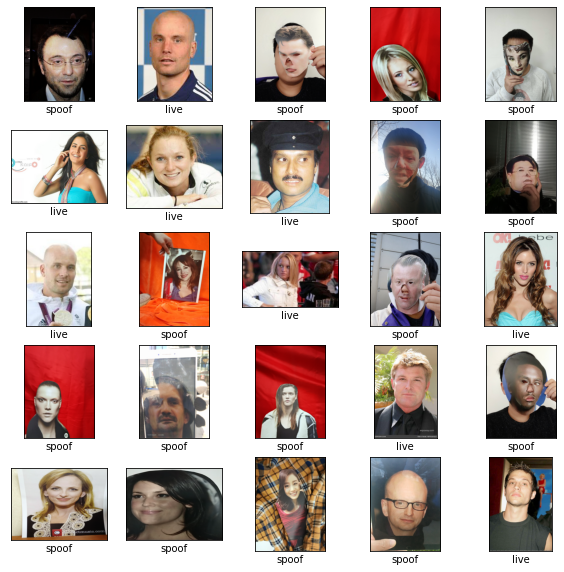

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

### Step 2: Customize the TensorFlow Model

Create a custom image classifier model based on the loaded data. The default model is EfficientNet-Lite0.


In [ ]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_2 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2562      
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


197/197 [==============================] - 372s 2s/step - loss: 0.3484 - accuracy: 0.9153 - val_loss: 0.2828 - val_accuracy: 0.9661
Epoch 2/5
197/197 [==============================] - 363s 2s/step - loss: 0.2846 - accuracy: 0.9621 - val_loss: 0.2699 - val_accuracy: 0.9714
Epoch 3/5
197/197 [==============================] - 369s 2s/step - loss: 0.2756 - accuracy: 0.9661 - val_loss: 0.2639 - val_accuracy: 0.9753
Epoch 4/5
197/197 [==============================] - 368s 2s/step - loss: 0.2681 - accuracy: 0.9732 - val_loss: 0.2609 - val_accuracy: 0.9766
Epoch 5/5
197/197 [==============================] - 364s 2s/step - loss: 0.2662 - accuracy: 0.9751 - val_loss: 0.2576 - val_accuracy: 0.9753


Have a look at the detailed model structure.

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_2 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2562      
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________


### Step 3: Evaluate the Customized Model

Evaluate the result of the model, get the loss and accuracy of the model.

In [ ]:
loss, accuracy = model.evaluate(test_data)

25/25 [==============================] - 80s 1s/step - loss: 0.2580 - accuracy: 0.9785


We could plot the predicted results in 100 test images. Predicted labels with red color are the wrong predicted results while others are correct.

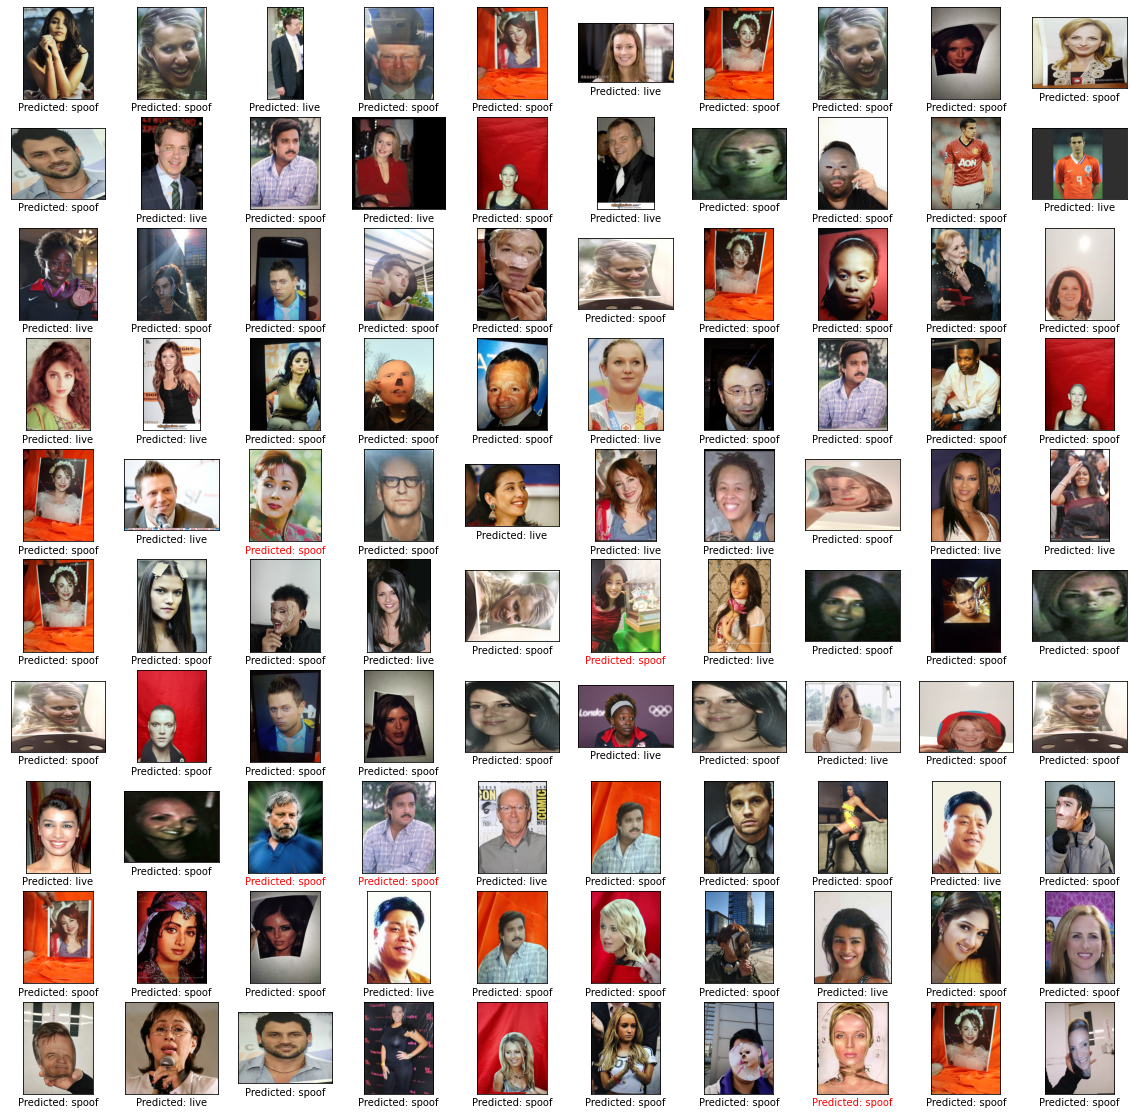

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

If the accuracy doesn't meet the app requirement, one could refer to [Advanced Usage](#scrollTo=zNDBP2qA54aK) to explore alternatives such as changing to a larger model, adjusting re-training parameters etc.

### Step 4: Export to TensorFlow Lite Model

Convert the trained model to TensorFlow Lite model format with [metadata](https://www.tensorflow.org/lite/convert/metadata) so that you can later use in an on-device ML application. The label file and the vocab file are embedded in metadata. The default TFLite filename is `model.tflite`.

In many on-device ML application, the model size is an important factor. Therefore, it is recommended that you apply quantize the model to make it smaller and potentially run faster.
The default post-training quantization technique is full integer quantization for the image classification task.

In [ ]:
model.export(export_dir='/content')

INFO:tensorflow:Assets written to: /tmp/tmpg302_sd8/assets


INFO:tensorflow:Assets written to: /tmp/tmpg302_sd8/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpngtdloip/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpngtdloip/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/model.tflite


See [example applications and guides of image classification](https://www.tensorflow.org/lite/models/image_classification/overview#example_applications_and_guides) for more details about how to integrate the TensorFlow Lite model into mobile apps.

This model can be integrated into an Android or an iOS app using the [ImageClassifier API](https://www.tensorflow.org/lite/inference_with_metadata/task_library/image_classifier) of the [TensorFlow Lite Task Library](https://www.tensorflow.org/lite/inference_with_metadata/task_library/overview).

The allowed export formats can be one or a list of the following:

*   `ExportFormat.TFLITE`
*   `ExportFormat.LABEL`
*   `ExportFormat.SAVED_MODEL`

By default, it just exports TensorFlow Lite model with metadata. You can also selectively export different files. For instance, exporting only the label file as follows:

In [ ]:
model.export(export_dir='/content/', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in /content/labels.txt


INFO:tensorflow:Saving labels in /content/labels.txt


You can also evaluate the tflite model with the `evaluate_tflite` method.

In [ ]:
model.evaluate_tflite('/content/model.tflite', test_data)

{'accuracy': 0.973384030418251}

## Advanced Usage

The `create` function is the critical part of this library. It uses transfer learning with a pretrained model similar to the [tutorial](https://www.tensorflow.org/tutorials/images/transfer_learning).

The `create` function contains the following steps:

1.   Split the data into training, validation, testing data according to parameter `validation_ratio` and `test_ratio`. The default value of `validation_ratio` and `test_ratio` are `0.1` and `0.1`.
2.   Download a [Image Feature Vector](https://www.tensorflow.org/hub/common_signatures/images#image_feature_vector) as the base model from TensorFlow Hub. The default pre-trained model is  EfficientNet-Lite0.
3.   Add a classifier head with a Dropout Layer with `dropout_rate` between head layer and pre-trained model. The default `dropout_rate` is the default `dropout_rate` value from [make_image_classifier_lib](https://github.com/tensorflow/hub/blob/master/tensorflow_hub/tools/make_image_classifier/make_image_classifier_lib.py#L55) by TensorFlow Hub.
4.   Preprocess the raw input data. Currently, preprocessing steps including normalizing the value of each image pixel to model input scale and resizing it to model input size.   EfficientNet-Lite0 have the input scale `[0, 1]` and the input image size `[224, 224, 3]`.
5.   Feed the data into the classifier model. By default, the training parameters such as training epochs, batch size, learning rate, momentum are the default values from [make_image_classifier_lib](https://github.com/tensorflow/hub/blob/master/tensorflow_hub/tools/make_image_classifier/make_image_classifier_lib.py#L55) by TensorFlow Hub. Only the classifier head is trained.


In this section, we describe several advanced topics, including switching to a different image classification model, changing the training hyperparameters etc.


## Customize Post-training quantization on the TensorFLow Lite model


[Post-training quantization](https://www.tensorflow.org/lite/performance/post_training_quantization) is a conversion technique that can reduce model size and inference latency, while also improving CPU and hardware accelerator inference speed, with a little degradation in model accuracy. Thus, it's widely used to optimize the model.


Model Maker library applies a default post-training quantization techique when exporting the model. If you want to customize post-training quantization, Model Maker supports multiple post-training quantization options using [QuantizationConfig](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/config/QuantizationConfig) as well. Let's take float16 quantization as an instance. First, define the quantization config.

In [ ]:
config = QuantizationConfig.for_float16()

Then we export the TensorFlow Lite model with such configuration.

In [ ]:
model.export(export_dir='/content', tflite_filename='model_fp16.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: /tmp/tmpoizknsjc/assets


INFO:tensorflow:Assets written to: /tmp/tmpoizknsjc/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp39sl4kad/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp39sl4kad/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/model_fp16.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/model_fp16.tflite


In Colab, you can download the model named `model_fp16.tflite` from the left sidebar, same as the uploading part mentioned above.

## Change the model


### Change to the model that's supported in this library.

This library supports  EfficientNet-Lite models, MobileNetV2, ResNet50 by now. [EfficientNet-Lite](https://github.com/tensorflow/tpu/tree/master/models/official/efficientnet/lite) are a family of image classification models that could achieve state-of-art accuracy and suitable for Edge devices. The default model is EfficientNet-Lite0.

We could switch model to MobileNetV2 by just setting parameter `model_spec` to the MobileNetV2 model specification in `create` method.

In [ ]:
model = image_classifier.create(train_data, model_spec=model_spec.get('mobilenet_v2'), validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_3 (HubK (None, 1280)              2257984   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


197/197 [==============================] - 331s 2s/step - loss: 0.3886 - accuracy: 0.8953 - val_loss: 0.2861 - val_accuracy: 0.9622
Epoch 2/5
197/197 [==============================] - 328s 2s/step - loss: 0.3114 - accuracy: 0.9470 - val_loss: 0.2697 - val_accuracy: 0.9740
Epoch 3/5
197/197 [==============================] - 326s 2s/step - loss: 0.2937 - accuracy: 0.9588 - val_loss: 0.2717 - val_accuracy: 0.9648
Epoch 4/5
197/197 [==============================] - 337s 2s/step - loss: 0.2893 - accuracy: 0.9608 - val_loss: 0.2812 - val_accuracy: 0.9635
Epoch 5/5
197/197 [==============================] - 327s 2s/step - loss: 0.2875 - accuracy: 0.9622 - val_loss: 0.2712 - val_accuracy: 0.9727


Evaluate the newly retrained MobileNetV2 model to see the accuracy and loss in testing data.

In [ ]:
loss, accuracy = model.evaluate(test_data)

25/25 [==============================] - 76s 1s/step - loss: 0.2837 - accuracy: 0.9670


### Change to the model in TensorFlow Hub

Moreover, we could also switch to other new models that inputs an image and outputs a feature vector with TensorFlow Hub format.

As [Inception V3](https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1) model as an example, we could define `inception_v3_spec` which is an object of [image_classifier.ModelSpec](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/image_classifier/ModelSpec) and contains the specification of the Inception V3 model.

We need to specify the model name `name`, the url of the TensorFlow Hub model `uri`. Meanwhile, the default value of `input_image_shape` is `[224, 224]`. We need to change it to `[299, 299]` for Inception V3 model.

In [ ]:
inception_v3_spec = image_classifier.ModelSpec(
    uri='https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1')
inception_v3_spec.input_image_shape = [299, 299]

Then, by setting parameter `model_spec` to `inception_v3_spec` in `create` method, we could retrain the Inception V3 model.

The remaining steps are exactly same and we could get a customized InceptionV3 TensorFlow Lite model in the end.

### Change your own custom model

If we'd like to use the custom model that's not in TensorFlow Hub, we should create and export [ModelSpec](https://www.tensorflow.org/hub/api_docs/python/hub/ModuleSpec) in TensorFlow Hub.

Then start to define `ModelSpec` object like the process above.

## Change the training hyperparameters
We could also change the training hyperparameters like `epochs`, `dropout_rate` and `batch_size` that could affect the model accuracy. The model parameters you can adjust are:


*   `epochs`: more epochs could achieve better accuracy until it converges but training for too many epochs may lead to overfitting.
*   `dropout_rate`: The rate for dropout, avoid overfitting. None by default.
*   `batch_size`: number of samples to use in one training step.  None by default.
*   `validation_data`: Validation data. If None, skips validation process. None by default.
*   `train_whole_model`: If true, the Hub module is trained together with the classification layer on top. Otherwise, only train the top classification layer. None by default.
*   `learning_rate`: Base learning rate. None by default.
*   `momentum`: a Python float forwarded to the optimizer. Only used when
      `use_hub_library` is True. None by default.
*   `shuffle`: Boolean, whether the data should be shuffled. False by default.
*   `use_augmentation`: Boolean, use data augmentation for preprocessing. False by default.
*   `use_hub_library`: Boolean, use `make_image_classifier_lib` from tensorflow hub to retrain the model. This training pipeline could achieve better performance for complicated dataset with many categories. True by default. 
*   `warmup_steps`: Number of warmup steps for warmup schedule on learning rate. If None, the default warmup_steps is used which is the total training steps in two epochs. Only used when `use_hub_library` is False. None by default.
*   `model_dir`: Optional, the location of the model checkpoint files. Only used when `use_hub_library` is False. None by default.

Parameters which are None by default like `epochs` will get the concrete default parameters in [make_image_classifier_lib](https://github.com/tensorflow/hub/blob/02ab9b7d3455e99e97abecf43c5d598a5528e20c/tensorflow_hub/tools/make_image_classifier/make_image_classifier_lib.py#L54) from TensorFlow Hub library or  [train_image_classifier_lib](https://github.com/tensorflow/examples/blob/f0260433d133fd3cea4a920d1e53ecda07163aee/tensorflow_examples/lite/model_maker/core/task/train_image_classifier_lib.py#L61).

For example, we could train with more epochs.


In [ ]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs=10)

Evaluate the newly retrained model with 10 training epochs.

In [ ]:
loss, accuracy = model.evaluate(test_data)

# Read more

You can read our [image classification](https://www.tensorflow.org/lite/examples/image_classification/overview) example to learn technical details. For more information, please refer to:

*   TensorFlow Lite Model Maker [guide](https://www.tensorflow.org/lite/guide/model_maker) and [API reference](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker).
*   Task Library: [ImageClassifier](https://www.tensorflow.org/lite/inference_with_metadata/task_library/image_classifier) for deployment.
*   The end-to-end reference apps: [Android](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification/android), [iOS](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification/ios), and [Raspberry PI](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification/raspberry_pi).

